<a href="https://colab.research.google.com/github/Storkers/PIBIC/blob/main/PIBIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python  --version

Python 3.10.12


# **Load the Data**

In [ ]:
import pandas as pd
from pandas import read_excel
from pandas import DataFrame
import matplotlib.pyplot as plt
import warnings
from math import sqrt

In [ ]:
series= read_excel('/content/drive/MyDrive/sanepar.xlsx', header=0, parse_dates=True, index_col=0).squeeze(1)
#series = pd.read_csv('/content/drive/MyDrive/archive/data.csv' ,header=0, parse_dates=True, index_col=0).squeeze(1)
series

FREQB1     FREQB2     FREQB3      LT01        FT01  \
Timestamp                                                                    
2018-01-01 00:00:00  39.716118          0          0  4.027903  270.285187   
2018-01-01 01:00:00  40.692509          0          0  4.241524  268.635803   
2018-01-01 02:00:00  34.512108          0          0  4.352295           0   
2018-01-01 03:00:00  33.531471          0          0  4.136808           0   
2018-01-01 04:00:00  33.191261          0          0  3.947308           0   
...                        ...        ...        ...       ...         ...   
2020-12-31 19:00:00  57.988792  46.797836          0  3.669613    0.115741   
2020-12-31 20:00:00  57.988792  47.061192          0  3.221217    0.115741   
2020-12-31 21:00:00   0.000000  45.869583  57.988792  2.803498    0.115741   
2020-12-31 22:00:00   0.000000  46.035812  57.988792  2.492699  282.855591   
2020-12-31 23:00:00   0.000000          0  54.145569   2.62292  277.031158   

                           FT02        FT03      PT01       PT02  
Timestamp                                                         
2018-01-01 00:00:00   76.920532   61.992577  5.232423  13.961227  
2018-01-01 01:00:00   83.023201   66.538521  5.431031  13.961227  
2018-01-01 02:00:00    82.35186   57.269573  5.555567  11.049756  
2018-01-01 03:00:00   69.360985   52.244926  5.358496  11.115347  
2018-01-01 04:00:00   59.742775    49.71859  5.184939  11.180938  
...                         ...         ...       ...        ...  
2020-12-31 19:00:00  149.436783  121.814819  4.499011  23.046875  
2020-12-31 20:00:00  151.018051  117.933388  4.070826  23.046875  
2020-12-31 21:00:00  129.294189  106.692932  3.714235  21.976273  
2020-12-31 22:00:00  111.951515   98.773148  3.443493  21.976273  
2020-12-31 23:00:00  106.797119   87.587082  3.610525  18.952547  

[26306 rows x 9 columns]

In [ ]:
coluna = 'FREQB1' #input("Nome da coluna: ")
series[coluna]
if series[coluna].dtypes == 'object':
  dfs[coluna]=pd.to_numeric(series[coluna], errors='coerce')
series=series[coluna]
series

Timestamp
2018-01-01 00:00:00    39.716118
2018-01-01 01:00:00    40.692509
2018-01-01 02:00:00    34.512108
2018-01-01 03:00:00    33.531471
2018-01-01 04:00:00    33.191261
                         ...    
2020-12-31 19:00:00    57.988792
2020-12-31 20:00:00    57.988792
2020-12-31 21:00:00     0.000000
2020-12-31 22:00:00     0.000000
2020-12-31 23:00:00     0.000000
Name: FREQB1, Length: 26306, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
series.plot(kind='line',figsize=(100,30))
plt.title("Série Temporal",fontsize = 100)
plt.xlabel('Data',fontsize = 100)
plt.ylabel('Consumo em L',fontsize = 100)
plt.legend().remove()
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

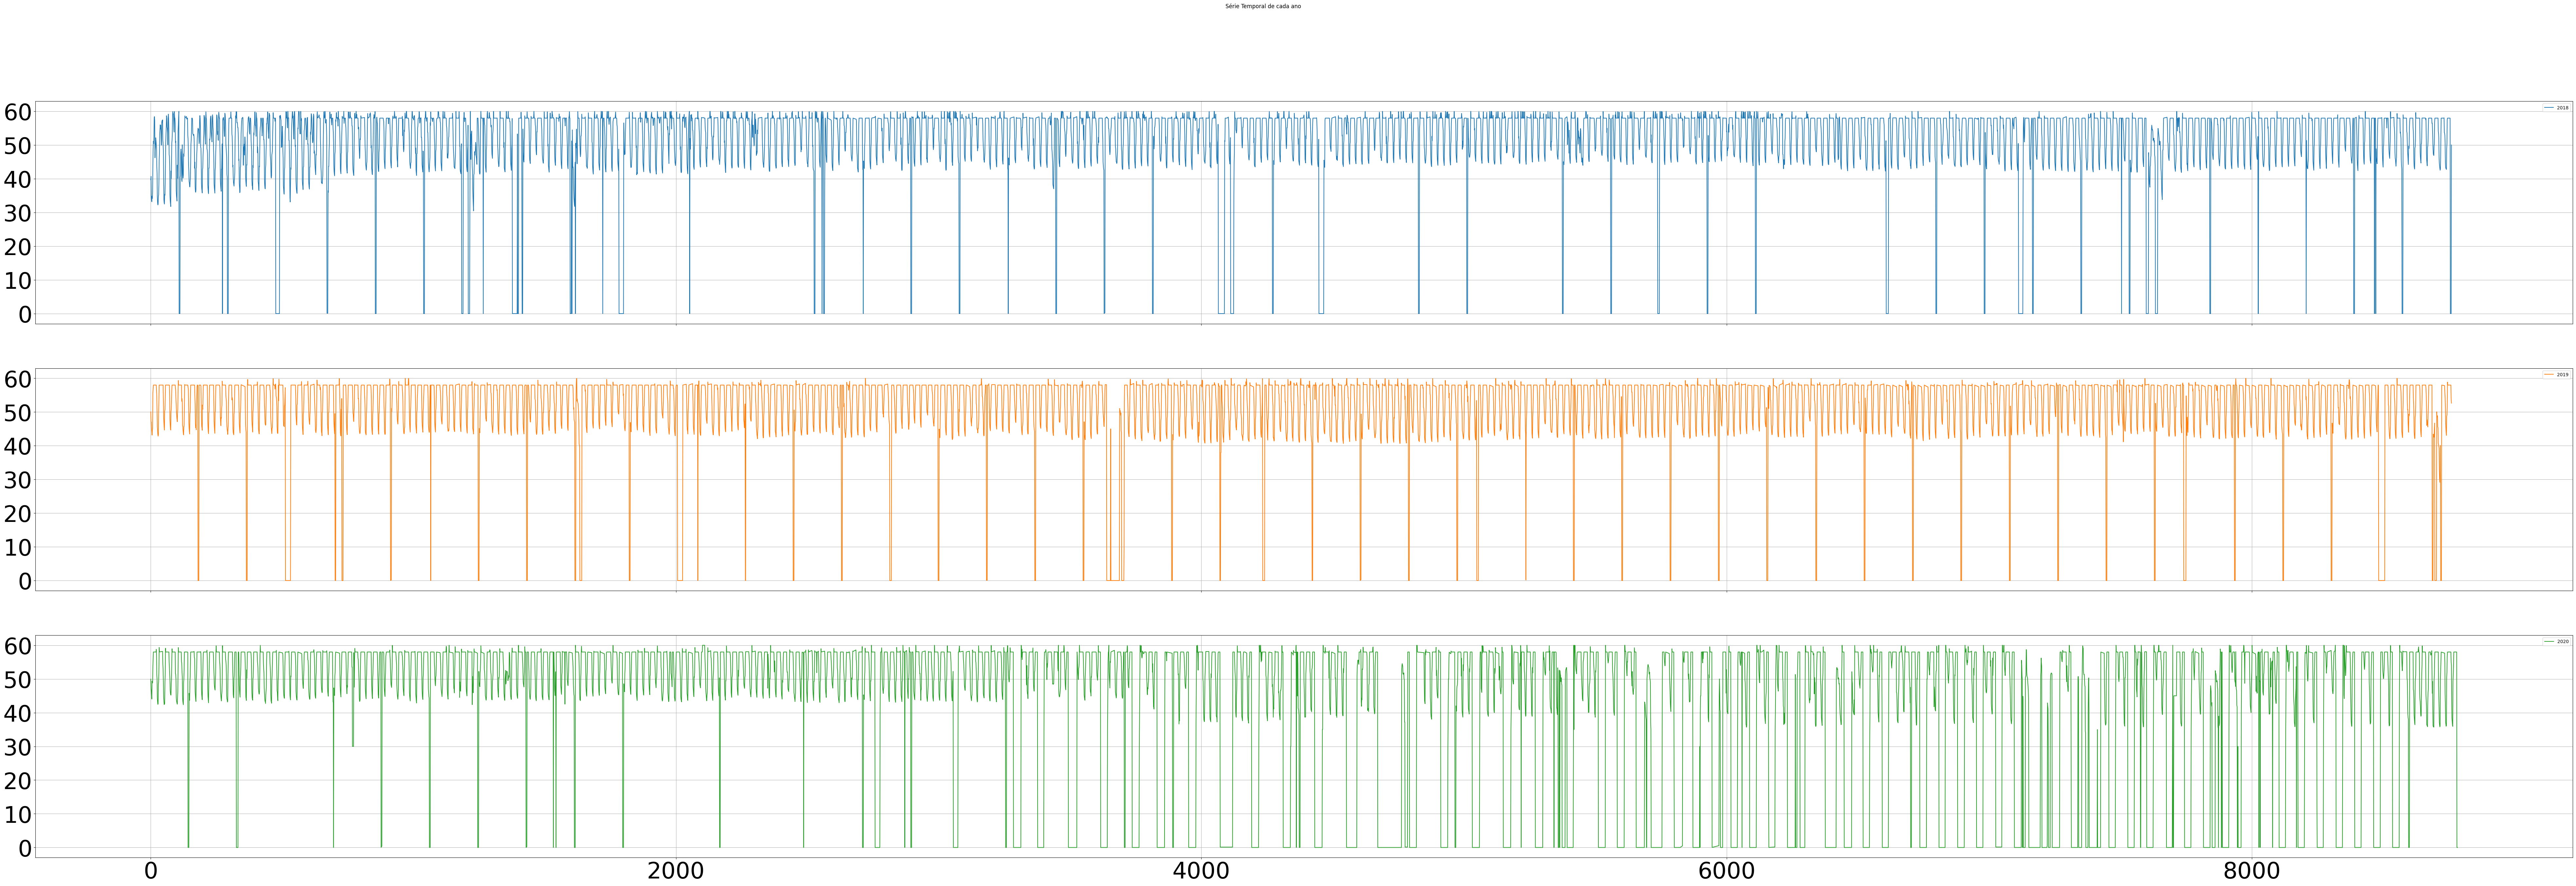

In [ ]:
from pandas import concat
from pandas import Grouper,Series

groups = series.groupby(Grouper(freq='A'))

years = concat([Series(x.values.flatten(), name=y)
                   for y,x in groups],
                  axis=1)

years.columns=['2018','2019','2020']
#years.columns = ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
years.plot(subplots=True, title='Série Temporal de cada ano',figsize=(100,30),grid=True,fontsize=50)

# **Preprocessing**

In [ ]:
from pandas import concat
from pandas import date_range
'''
  Obs: O algoritmo compara 2 array e verifica se as datas/horas estão coerentes, dependendo da situação
        existe a necessidade do deslocamento de verificação, por exemplo:

      Sequência | Date (com erros)  | Valor ideal (esperado)
          0     |         1         |      1                     Correto
          1     |         2         |      2                     Correto
          2     |         3         |      3                     Correto
          3     |         3         |      4                     Incorreto (Valor ideal = Valor ideal - 1)
          4     |         4         |      5 - 1          = 4    Correto
          5     |         5         |      6 - 1          = 5    Correto
          6     |         7         |      7 - 1          = 6    Incorreto (Valor ideal = Valor ideal + 1)
          7     |         8         |      8 - 1 + 1      = 8    Correto
          8     |         8         |      9 - 1 + 1      = 9    Incorreto (Valor ideal = Valor ideal - 1)
          9     |         9         |      10 - 1 + 1 - 1 = 9    Correto
          10    |         10        |      11 - 1 + 1 - 1 = 10   Correto

    Quando existe duplicidade de data/hora: a 2° cópia é excluído.
    Quando não existe data/hora: A data/hora é adicionado no final do dataframe para depois ser ordenado corretamente.

    Erros Possíveis: Se houve mais de uma data/hora duplicada.

'''

range_date = date_range(series.index.min(), periods=(series.shape[0] + 1), freq="H")  # Array ideal com data/hora corretas em sequência.

series = series.reset_index() # Foi resetado o index.

'''
  Motivo:

  Se houvesse uma linha dupliacada no Dataframe com o Timestamp por exemplo: '2018-01-01 02:00:00',
    utilizando a função drop(), as 2 linhas seriam excluídas, isto é, perdendo os dados desta data.
  Portanto, o índice foi resetado para depois ser usado como referência de exclusão de uma linha específica.

'''

n_drop = 0              # Contador de deslocamento do array de referência.
deslocamento_date = 0   # Contador de deslocamento do array de referência.

for x in range(len(series)):

  if(series['Timestamp'][x] != range_date[x+deslocamento_date+n_drop]):  # Se a data/hora é diferente do esperado (isto é, esta incoerente).

    if(series['Timestamp'][x] == series['Timestamp'][x-1]): # Se existe duplicação de data/hora
      print("DUPLICADO        -> linha (no Excel) = " + str(x+2) + " / Data incorreta = " + str(series['Timestamp'][x]) + " / Data correta = " + str(range_date[x+deslocamento_date+n_drop]))

      series.drop(x, inplace= True)  # 2° Cópia sendo excluída do Dataframe.
      n_drop -= 1

    else: # Se não existe data/hora

      print("DATA NÃO EXISTE  -> linha (no Excel) = " + str(x+2) + " / Data incorreta = " + str(series['Timestamp'][x]) + " / Data correta = " + str(range_date[x+deslocamento_date+n_drop]))
      series.loc[len(series)+abs(n_drop)+deslocamento_date] = [range_date[x+deslocamento_date+n_drop],0] # Adicionando data/hora no final do Dataframe.
      deslocamento_date += 1

print("\n\n")
series.sort_values(axis=0,inplace= True,by='Timestamp') # Ordenando data/hora de todo Dataframe corretamente.
series = series.set_index('Timestamp')   # Restaurando Timestamp como referência para ser tratado como uma série e não um DataFrame.


DUPLICADO        -> linha (no Excel) = 1154 / Data incorreta = 2018-02-17 23:00:00 / Data correta = 2018-02-18 00:00:00
DATA NÃO EXISTE  -> linha (no Excel) = 7371 / Data incorreta = 2018-11-04 01:00:00 / Data correta = 2018-11-04 00:00:00
DUPLICADO        -> linha (no Excel) = 8760 / Data incorreta = 2018-12-31 21:00:00 / Data correta = 2018-12-31 22:00:00
DUPLICADO        -> linha (no Excel) = 9891 / Data incorreta = 2019-02-16 23:00:00 / Data correta = 2019-02-17 00:00:00





# **Fazendo interpolação linear com os dados nulos.**

In [ ]:
for x in range(len(series)):

  if(series[coluna][x] == 0):
    series[coluna][x].astype(str)  # Cast para todos os dados tipo float64 para String
    series[coluna][x] = None       # Deixando valores = Null

print("Total de valores Nulos ANTES da interpolação " + str(series.isnull().sum()) + "\n")

series.interpolate(method='time', axis=0, inplace= True)

print("Total de valores Nulos DEPOIS da interpolação " + str(series.isnull().sum()))

Total de valores Nulos ANTES da interpolação FREQB1    2450
dtype: int64

Total de valores Nulos DEPOIS da interpolação FREQB1    0
dtype: int64


In [ ]:
# Referência: Introduction to Time Series Forecasting with Python (Jason Brownlee)

rolling = series.rolling(window=10) # A função rolling() (window=10, agrupa os objetos de 10 em 10,
                                   # no qual, roling.mean() calcula a média para cada 10 elementos da série)

rolling_mean = rolling.mean()

print("Valores da Média Móvel Final:\n\n")
print(rolling_mean.head(10))
print("\n\n")

for x in range(len(series)):

  if(series[coluna][x] < 15):

    series[coluna][x] = rolling_mean[coluna][x]


soma = 0

for x in range(len(series)):

  if(series[coluna][x] < 15):

    print("Linha = " + str(x) + " / Valor = " + str(series[coluna][x]))
    soma += 1

print("\nTotal de " + str(soma) + " Linhas próximo de 0")

Valores da Média Móvel Final:


                        FREQB1
Timestamp                     
2018-01-01 00:00:00        NaN
2018-01-01 01:00:00        NaN
2018-01-01 02:00:00        NaN
2018-01-01 03:00:00        NaN
2018-01-01 04:00:00        NaN
2018-01-01 05:00:00        NaN
2018-01-01 06:00:00        NaN
2018-01-01 07:00:00        NaN
2018-01-01 08:00:00        NaN
2018-01-01 09:00:00  37.923654



Linha = 21599 / Valor = 11.688577687740326
Linha = 21600 / Valor = 5.901050846278667
Linha = 21601 / Valor = 0.11352400481700897
Linha = 21602 / Valor = 0.11352400481700897
Linha = 21603 / Valor = 0.11352400481700897
Linha = 21604 / Valor = 0.11352400481700897
Linha = 21605 / Valor = 0.11352400481700897
Linha = 21606 / Valor = 0.11352400481700897
Linha = 21607 / Valor = 0.11352400481700897
Linha = 21608 / Valor = 0.11352400481700897
Linha = 21609 / Valor = 0.11352400481700897
Linha = 21610 / Valor = 0.11352400481700897
Linha = 21611 / Valor = 0.11352400481700897
Linha = 21612 / Valor = 

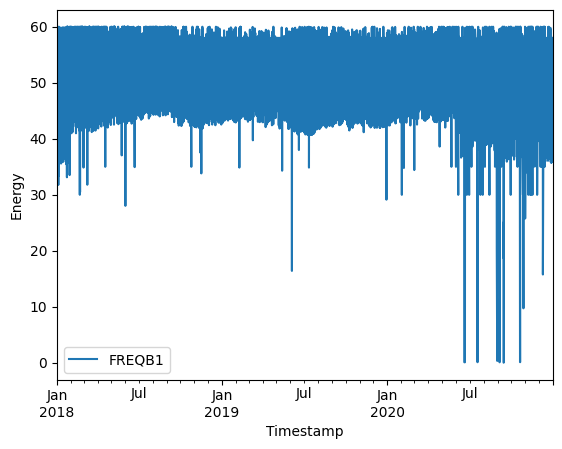

In [ ]:
ax = series.plot()
ax.set_ylabel('Energy')
plt.show()

In [ ]:
serie = series
serie
series

FREQB1
Timestamp                     
2018-01-01 00:00:00  39.716118
2018-01-01 01:00:00  40.692509
2018-01-01 02:00:00  34.512108
2018-01-01 03:00:00  33.531471
2018-01-01 04:00:00  33.191261
...                        ...
2020-12-31 19:00:00  57.988792
2020-12-31 20:00:00  57.988792
2020-12-31 21:00:00  57.988792
2020-12-31 22:00:00  57.988792
2020-12-31 23:00:00  57.988792

[26304 rows x 1 columns]

In [ ]:
groups = series.groupby(Grouper(freq='A'))

years = concat([Series(x.values.flatten(), name=y)
                   for y,x in groups],
                  axis=1)

years.columns=['2018','2019','2020']
years.plot(subplots=True, title='Série Temporal de cada ano',figsize=(100,30),grid=True,fontsize=50)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

In [ ]:
series

FREQB1
Timestamp                     
2018-01-01 00:00:00  39.716118
2018-01-01 01:00:00  40.692509
2018-01-01 02:00:00  34.512108
2018-01-01 03:00:00  33.531471
2018-01-01 04:00:00  33.191261
...                        ...
2020-12-31 19:00:00  57.988792
2020-12-31 20:00:00  57.988792
2020-12-31 21:00:00  57.988792
2020-12-31 22:00:00  57.988792
2020-12-31 23:00:00  57.988792

[26304 rows x 1 columns]

# **Make series stationary**

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# ADF test for stationary
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for threshold, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (threshold, adf_stat))


print(adf_test(series[coluna]))

ADF Statistic:  -17.37025118367395
P-Value:  5.14270980015662e-30
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57
None


In [ ]:
# Plot partial autocorrelation
plt.rc("figure", figsize=(15,10))
plot_pacf(series[coluna], method='ywm')
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

# **Determine d value**

Não existe tal método que possa nos dizer quanto valor de d será ideal. No entanto, o valor da diferenciação pode ser ideal até 2, por isso vamos tentar a nossa série temporal em ambos. Os pandas fornecem essa opção de diferenciação. Vamos utilizar isso.

https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


<ipython-input-20-2c8bae7b95dd>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.plot(series['2018-01']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
<ipython-input-20-2c8bae7b95dd>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax2.plot(series['2018-01'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
<ipython-input-20-2c8bae7b95dd>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax3.plot(series['2018-01'].diff().diff());

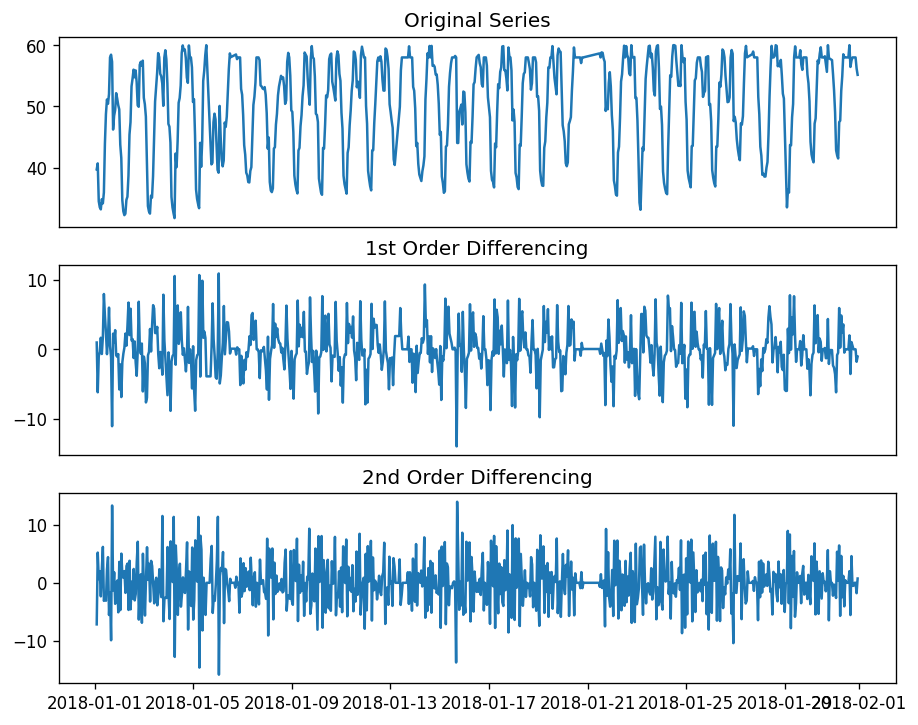

In [ ]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(series['2018-01']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(series['2018-01'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(series['2018-01'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

Aqui podemos ver como a série temporal se tornou estacionária. Uma coisa que é perceptível aqui é que, na serie original, temos menos ruídos nos dados, enquanto na 1ª e 2ª ordem há um aumento no ruído. Assim, podemos selecionar a serie original para o nosso modelo.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(series['2018-01'], ax=ax1)
plot_acf(series['2018-01'].diff().dropna(), ax=ax2)
plot_acf(series['2018-01'].diff().diff().dropna(), ax=ax3)

<ipython-input-21-2da0839c0609>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plot_acf(series['2018-01'], ax=ax1)
<ipython-input-21-2da0839c0609>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plot_acf(series['2018-01'].diff().dropna(), ax=ax2)
<ipython-input-21-2da0839c0609>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plot_acf(series['2018-01'].diff().diff().dropna(), ax=ax3)


Aqui podemos ver que na diferença de segunda ordem o atraso imediato foi para o lado negativo, representando que na segunda ordem a série se tornou sobre a diferença.

# **Create ACF and PACF plots**

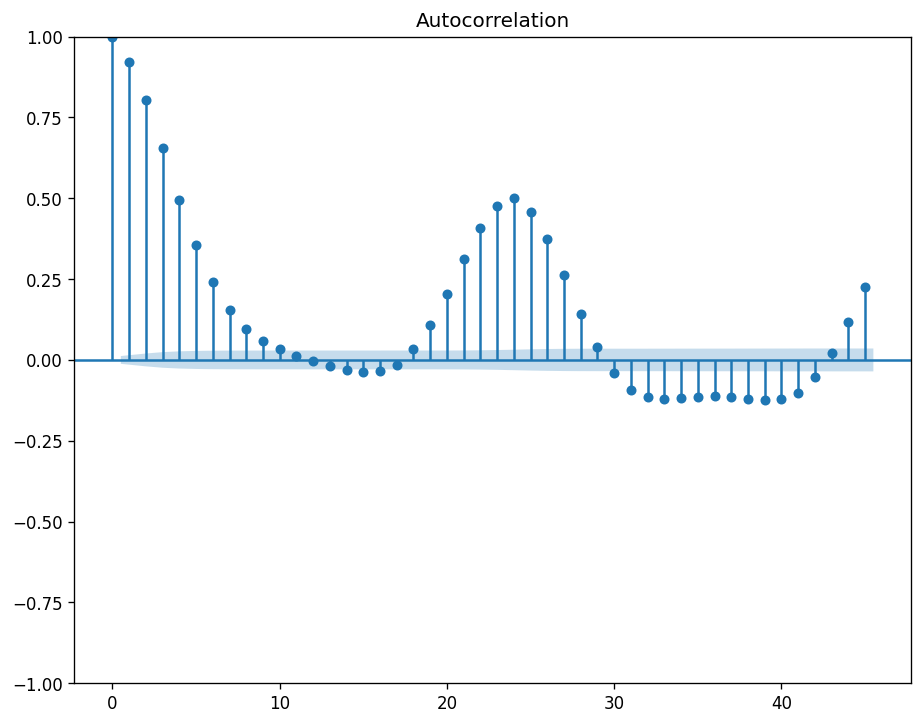

In [ ]:
#ACF plot of time series
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.show()

Para um modelo de RA, o PACF teórico "desliga" após a ordem do modelo. A frase "desliga" significa que, em teoria, as autocorrelações parciais são iguais a 0 além desse ponto. Dito de outra forma, o número de autocorrelações parciais diferentes de zero dá a ordem do modelo AR. Por "ordem do modelo" queremos dizer o atraso mais extremo de x que é usado como um preditor.

"Para um modelo de MA, o PACF teórico não desliga, mas em vez disso diminui em direção a 0 de alguma maneira"

Entao podemos dizer que a ordem de valores validos para a variavel P, se submete a valores antes da inversao de polaridade no grafico, ou seja, antes dos valores passarem pelo zero

https://online.stat.psu.edu/stat510/lesson/2/2.2

# **P D Q values**

In [ ]:
##P = (0...1)
##d = 0
##q = (0...10)

# **Fit ARIMA model**

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [ ]:
series = series.to_period("H")

#train_size = int(len(series) * 0.80)
train_size = int(26204)
train, test = series[0:train_size], series[train_size:]

In [ ]:
print(test)

                     FREQB1
Timestamp                  
2020-12-27 20:00  57.369637
2020-12-27 21:00  58.358662
2020-12-27 22:00  52.664150
2020-12-27 23:00  45.731861
2020-12-28 00:00  49.258430
...                     ...
2020-12-31 19:00  57.988792
2020-12-31 20:00  57.988792
2020-12-31 21:00  57.988792
2020-12-31 22:00  57.988792
2020-12-31 23:00  57.988792

[100 rows x 1 columns]


In [ ]:
import pmdarima as pm
from pmdarima.arima import auto_arima

model_pm_fit = pm.auto_arima(train, start_p=0, start_q=0, start_d=0,
                              max_p=1, max_q=10, max_d=1,  # Valor máximo de p, q e d
                              test='adf',                 # Use o ADF_test para encontrar o melhor 'd'
                              seasonal=False,             # Sem sazonalidade
                              trace=True,                 # Visualizar a saída
                              error_action='ignore',      # Ignorar erros
                              suppress_warnings=True,
                              stepwise=False)             # Se True, intera pelas combinações de parâmetros do ARIMA(p,d,q), de forma otimizada

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=283323.482, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=248589.210, Time=5.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=220213.043, Time=17.46 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=199262.048, Time=23.51 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=184016.292, Time=28.72 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=172766.235, Time=25.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=126807.356, Time=1.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=125888.489, Time=2.67 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=125332.272, Time=3.80 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=125316.448, Time=6.17 sec

Best model:  ARIMA(1,0,4)(0,0,0)[0]          
Total fit time: 115.495 seconds


In [ ]:
print(model_pm_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                26204
Model:               SARIMAX(1, 0, 4)   Log Likelihood              -62652.224
Date:                Fri, 29 Mar 2024   AIC                         125316.448
Time:                        11:47:24   BIC                         125365.490
Sample:                    01-01-2018   HQIC                        125332.286
                         - 12-27-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9978      0.001   1800.513      0.000       0.997       0.999
ma.L1          0.2234      0.003     83.433      0.000       0.218       0.229
ma.L2          0.2224      0.004     61.595      0.0

# **Predict values on validation set:**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import time

inicio = time.time()

def evaluate_arima_model(series, arima_order,contador):

  train_size = int(26204)
  X = series.values
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  predictions = list()
  for t in range(len(test)):
    contador += 1
    print("Contador = " + str(contador))
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    print("Valor = " + str(yhat))
    print()
    predictions.append(yhat)
    history.append(test[t])

  return predictions


contador = 0

y_pred_stats = evaluate_arima_model(series, (1, 0, 3),contador)

fim = time.time()
print(f'\n\nTempo total = {(fim - inicio)/60}min')

Contador = 1
Valor = 57.19498182818312

Contador = 2
Valor = 57.109571045070574

Contador = 3
Valor = 58.09916309845596

Contador = 4
Valor = 51.52000242132387

Contador = 5
Valor = 43.98887503989279

Contador = 6
Valor = 48.78029568822948

Contador = 7
Valor = 41.42274399682509

Contador = 8
Valor = 36.66336094467135

Contador = 9
Valor = 35.71213427343142

Contador = 10
Valor = 37.84336519964377

Contador = 11
Valor = 38.25970527806567

Contador = 12
Valor = 53.30270502064126

Contador = 13
Valor = 53.88862825126464

Contador = 14
Valor = 57.61144605435345

Contador = 15
Valor = 57.32304087078876

Contador = 16
Valor = 57.83253943126738

Contador = 17
Valor = 57.45386019630948

Contador = 18
Valor = 57.47958197339905

Contador = 19
Valor = 57.47748767546791

Contador = 20
Valor = 57.55167880135922

Contador = 21
Valor = 57.52354988267899

Contador = 22
Valor = 57.51028356631163

Contador = 23
Valor = 57.50712738596674

Contador = 24
Valor = 57.518243649980064

Contador = 25
Valor = 5

In [ ]:
import time

inicio = time.time()

def evaluate_arima_model(series,modelo,contador):

  train_size = int(26204)
  X = series.values
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  predictions = list()
  for t in range(len(test)):
    contador += 1
    print("Contador = " + str(contador))
    modelo_fit = modelo.fit(history)
    yhat = modelo_fit.predict(n_periods=1)[0]
    print("Valor = " + str(yhat))
    print()
    predictions.append(yhat)
    history.append(test[t])

  return predictions


contador = 0

y_pred_pm = evaluate_arima_model(series,model_pm_fit,contador)

fim = time.time()

print(f'\n\nTempo total = {(fim - inicio)/60}min')

Contador = 1
Valor = 57.539131210017956

Contador = 2
Valor = 57.41182211443337

Contador = 3
Valor = 58.50256753855897

Contador = 4
Valor = 51.40574058841465

Contador = 5
Valor = 43.20047902123755

Contador = 6
Valor = 48.40218617241151

Contador = 7
Valor = 40.16200693777964

Contador = 8
Valor = 34.673602751122516

Contador = 9
Valor = 33.951515579960535

Contador = 10
Valor = 36.11722701237838

Contador = 11
Valor = 36.24130254151121

Contador = 12
Valor = 52.64570727033155

Contador = 13
Valor = 53.53789516432786

Contador = 14
Valor = 57.58852906149704

Contador = 15
Valor = 57.77968846380052

Contador = 16
Valor = 58.34447406008104

Contador = 17
Valor = 57.812237650996444

Contador = 18
Valor = 57.83625662419766

Contador = 19
Valor = 57.87715821239653

Contador = 20
Valor = 57.955081286255876

Contador = 21
Valor = 57.90784223391771

Contador = 22
Valor = 57.896143519536956

Contador = 23
Valor = 57.89977818759668

Contador = 24
Valor = 57.91068559108529

Contador = 25
Valor

In [ ]:
y_true = test.values

In [ ]:
import numpy as np

y_pred_pm = np.array(y_pred_pm)

print(y_pred_pm)

[57.53913121 57.41182211 58.50256754 51.40574059 43.20047902 48.40218617
 40.16200694 34.67360275 33.95151558 36.11722701 36.24130254 52.64570727
 53.53789516 57.58852906 57.77968846 58.34447406 57.81223765 57.83625662
 57.87715821 57.95508129 57.90784223 57.89614352 57.89977819 57.91068559
 57.90752948 57.90492546 57.90481822 57.90622288 45.59670686 42.2699797
 39.43871997 36.50052378 35.56535245 35.42086044 36.30213705 53.10188951
 54.99376479 56.35444133 57.59152829 58.2636315  58.0254562  57.66177607
 57.70593762 57.79516242 57.77133129 57.70185423 57.67477641 57.66560108
 57.64565621 57.61674014 57.59111592 57.56883714 54.2425506  43.1321811
 39.77107844 35.186667   36.24349287 35.77962143 36.47829216 53.47905702
 54.76458002 58.57152654 57.49454744 58.15244105 57.79022438 57.95538356
 57.87260365 57.92614739 57.89782466 57.90912641 57.90276017 57.90735724
 57.90525886 57.90596454 57.90543265 57.90584222 54.27915247 53.04096884
 40.28097655 35.60241437 35.80147718 36.67412411 36.0

In [ ]:
y_true = y_true.reshape(100,)
print(y_true)

[57.36963654 58.35866165 52.66415024 45.73186111 49.25843048 41.12498474
 36.22364426 35.85088348 35.82611847 35.70512772 49.63658142 51.13056946
 55.69478226 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 47.90633774 44.77014923 41.31907272
 37.10427856 36.31290054 35.78678513 36.12626648 49.96899033 52.18247604
 54.83897781 57.96971893 57.94590378 57.92209244 57.89827728 57.87446213
 57.85064697 57.82683182 57.80301666 57.77920151 57.75538635 57.7315712
 57.70775604 57.68394089 57.66012573 54.93067169 45.71721268 42.31515503
 37.14033127 36.46200943 35.97554398 36.2507782  50.44623184 52.02122116
 56.66678619 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 55.01865387 53.8836174  43.09151459
 38.30857849 37.31617737 36.22912216 35.93584061 49.

In [ ]:
import numpy as np

y_pred_stats = np.array(y_pred_stats)

print(y_pred_stats)

[57.19498183 57.10957105 58.0991631  51.52000242 43.98887504 48.78029569
 41.422744   36.66336094 35.71213427 37.8433652  38.25970528 53.30270502
 53.88862825 57.61144605 57.32304087 57.83253943 57.4538602  57.47958197
 57.47748768 57.5516788  57.52354988 57.51028357 57.50712739 57.51824365
 57.51860946 57.51583274 57.51425122 57.51555994 46.1863489  43.14813041
 40.55324068 38.26484085 37.51095817 37.26332735 38.11266967 53.63240603
 55.33031827 56.52133767 57.09853639 57.68703967 57.70927654 57.36017871
 57.29750892 57.37963395 57.40886847 57.34906076 57.30219929 57.28975369
 57.2816944  57.25899482 57.23215982 57.21013846 54.15061243 43.93315514
 40.86270667 36.76405568 38.11284406 37.73122217 38.33557184 53.90610142
 55.06668826 58.58244671 57.01551447 57.58841498 57.414499   57.63137883
 57.49317713 57.50793537 57.49882544 57.52695562 57.51777074 57.51408759
 57.51203927 57.51582525 57.51609794 57.51534446 54.17723521 53.04518005
 41.30667251 37.14703247 37.38139386 38.54746596 38

In [ ]:
import numpy as np
y_true = np.array(y_true)
print(y_true)

[57.36963654 58.35866165 52.66415024 45.73186111 49.25843048 41.12498474
 36.22364426 35.85088348 35.82611847 35.70512772 49.63658142 51.13056946
 55.69478226 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 47.90633774 44.77014923 41.31907272
 37.10427856 36.31290054 35.78678513 36.12626648 49.96899033 52.18247604
 54.83897781 57.96971893 57.94590378 57.92209244 57.89827728 57.87446213
 57.85064697 57.82683182 57.80301666 57.77920151 57.75538635 57.7315712
 57.70775604 57.68394089 57.66012573 54.93067169 45.71721268 42.31515503
 37.14033127 36.46200943 35.97554398 36.2507782  50.44623184 52.02122116
 56.66678619 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 55.01865387 53.8836174  43.09151459
 38.30857849 37.31617737 36.22912216 35.93584061 49.

In [ ]:
from sklearn.metrics import mean_absolute_error # MAE


MAE_stats = mean_absolute_error(y_true, y_pred_stats)

MAE_pm = mean_absolute_error(y_true, y_pred_pm)

print("MAE da statsmodels = " + str(MAE_stats))
print("MAE da pmdarima    = " + str(MAE_pm))

MAE da statsmodels = 1.822303071344101
MAE da pmdarima    = 1.5922075974965657


In [ ]:
from sklearn.metrics import mean_squared_error  #MSE e RMSE

MSE_stats = mean_squared_error(y_true, y_pred_stats,squared=True) # Se True retornar o valor MSE, se False retornar o valor RMSE.
RMSE_stats = mean_squared_error(y_true, y_pred_stats,squared=False)

MSE_pm = mean_squared_error(y_true, y_pred_pm,squared=True) # Se True retornar o valor MSE, se False retornar o valor RMSE.
RMSE_pm = mean_squared_error(y_true, y_pred_pm,squared=False)

print("MSE da statsmodels  = " + str(MSE_stats))
print("RMSE da statsmodels = " + str(RMSE_stats))
print()
print("MSE da pmdarima  = " + str(MSE_pm))
print("RMSE da pmdarima = " + str(RMSE_pm))

MSE da statsmodels  = 11.069500938999484
RMSE da statsmodels = 3.327085953052533

MSE da pmdarima  = 12.544333035294905
RMSE da pmdarima = 3.541797994704795


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error # MAPE

MAPE_stats = mean_absolute_percentage_error(y_true,  y_pred_stats)

MAPE_pm = mean_absolute_percentage_error(y_true,  y_pred_pm)

print("MAPE da statsmodels = " + str(MAPE_stats))
print()
print("MAPE da pmdarima    = " + str(MAPE_pm))

MAPE da statsmodels = 0.03881686484393071

MAPE da pmdarima    = 0.0337876069127187


In [ ]:
from sklearn.metrics import r2_score  # R^2

r_2_stats = r2_score(y_true,  y_pred_stats)
r_2_pm = r2_score(y_true,  y_pred_pm)

print("R^2 da statsmodels = " + str(r_2_stats))
print()
print("R^2 da pmdarima    = " + str(r_2_pm))

R^2 da statsmodels = 0.8325192630624513

R^2 da pmdarima    = 0.8102051616672865


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(y_true,  y_pred_stats)
mape = mean_absolute_percentage_error(y_true,  y_pred_stats)
MSE_stats = mean_squared_error(y_true, y_pred_stats,squared=True) # Se True retornar o valor MSE, se False retornar o valor RMSE.
rmse = np.sqrt(mean_squared_error(y_true,  y_pred_stats))
r_2_stats = r2_score(y_true,  y_pred_stats)

print('      Métricas Arima')
print('')
print(f'mae - manual: {mae}')
print(f'mape - manual: {mape*100}')
print(f'mse - manual: {MSE_stats}')
print(f'rmse - manual: {rmse}')
print(f'R^2  - manual: {r_2_stats}')

      Métricas Arima

mae - manual: 1.822303071344101
mape - manual: 3.8816864843930707
mse - manual: 11.069500938999484
rmse - manual: 3.327085953052533
R^2  - manual: 0.8325192630624513


In [ ]:
mae = mean_absolute_error(y_true,  y_pred_pm)
mape = mean_absolute_percentage_error(y_true,  y_pred_pm)
MSE_pm = mean_squared_error(y_true, y_pred_pm,squared=True) # Se True retornar o valor MSE, se False retornar o valor RMSE.
rmse = np.sqrt(mean_squared_error(y_true,  y_pred_pm))
r_2_pm = r2_score(y_true,  y_pred_pm)

print('      Métricas Auto-Arima')
print('')
print(f'mae - auto: {mae}')
print(f'mape - auto: {mape*100}')
print(f'mse - manual: {MSE_pm}')
print(f'rmse - auto: {rmse}')
print(f'R^2  - auto: {r_2_pm}')

      Métricas Auto-Arima

mae - auto: 1.5922075974965657
mape - auto: 3.3787606912718697
mse - manual: 12.544333035294905
rmse - auto: 3.541797994704795
R^2  - auto: 0.8102051616672865


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 FREQB1   No. Observations:                26304
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -62337.681
Date:                Fri, 29 Mar 2024   AIC                         124685.362
Time:                        12:21:03   BIC                         124726.250
Sample:                    01-01-2018   HQIC                        124698.564
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.4259      0.203    263.420      0.000      53.028      53.823
ar.L1          0.8601      0.002    345.325      0.000       0.855       0.865
ma.L1          0.2352      0.003     71.570      0.0

In [ ]:
#msk = (series.index < len(series)-100)
#df_train = series[msk].copy()
#df_test = series[~msk].copy()

In [ ]:
#forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
#df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

#df.plot()

# **PROPHET**

In [ ]:
from prophet import Prophet

In [ ]:
serie

FREQB1
Timestamp                     
2018-01-01 00:00:00  39.716118
2018-01-01 01:00:00  40.692509
2018-01-01 02:00:00  34.512108
2018-01-01 03:00:00  33.531471
2018-01-01 04:00:00  33.191261
...                        ...
2020-12-31 19:00:00  57.988792
2020-12-31 20:00:00  57.988792
2020-12-31 21:00:00  57.988792
2020-12-31 22:00:00  57.988792
2020-12-31 23:00:00  57.988792

[26304 rows x 1 columns]

In [ ]:
serie = serie.reset_index(drop=False)
serie.index = serie.index.astype(int)
serie

Timestamp     FREQB1
0     2018-01-01 00:00:00  39.716118
1     2018-01-01 01:00:00  40.692509
2     2018-01-01 02:00:00  34.512108
3     2018-01-01 03:00:00  33.531471
4     2018-01-01 04:00:00  33.191261
...                   ...        ...
26299 2020-12-31 19:00:00  57.988792
26300 2020-12-31 20:00:00  57.988792
26301 2020-12-31 21:00:00  57.988792
26302 2020-12-31 22:00:00  57.988792
26303 2020-12-31 23:00:00  57.988792

[26304 rows x 2 columns]

In [ ]:
serie.rename(columns={'Timestamp': 'ds'}, inplace=True)
serie.rename(columns={'FREQB1': 'y'}, inplace=True)
serie

ds          y
0     2018-01-01 00:00:00  39.716118
1     2018-01-01 01:00:00  40.692509
2     2018-01-01 02:00:00  34.512108
3     2018-01-01 03:00:00  33.531471
4     2018-01-01 04:00:00  33.191261
...                   ...        ...
26299 2020-12-31 19:00:00  57.988792
26300 2020-12-31 20:00:00  57.988792
26301 2020-12-31 21:00:00  57.988792
26302 2020-12-31 22:00:00  57.988792
26303 2020-12-31 23:00:00  57.988792

[26304 rows x 2 columns]

In [ ]:
# definindo uma data de corte
data_fim = '2020-12-20'
# definindo os dados de treino, antes da data de corte
train = serie.loc[serie['ds'] <= data_fim]
# definindo os dados de teste posterior a data de corte
test = serie.loc[serie['ds'] > data_fim]

In [ ]:
# contando a quantidade de dias à frente para checar a acurácia da previsão
dias_a_prever = len(test.ds.unique())
# checando a quantidade de dias
dias_a_prever

287

In [ ]:
# Instanciando o modelo
m = Prophet(changepoint_prior_scale=0.1, seasonality_mode='multiplicative')

inicio_treinamento = time.time()

# Ajustando o modelo aos dados
model=m.fit(serie)

tempo_treinamento = time.time() - inicio_treinamento

inicio_previsao = time.time()

previsao = model.predict(test)

# Obtenha o tempo de previsão
tempo_previsao = time.time() - inicio_previsao

print("Tempo de treinamento: {:.2f} segundos".format(tempo_treinamento))
print("Tempo de previsão: {:.2f} segundos".format(tempo_previsao))
#Neste exemplo, o código mede o tempo de treinamento e o tempo de previsão do modelo Prophet em segundos. É importante lembrar que o tempo de processamento pode variar dependendo do tamanho do conjunto de dados e da complexidade do modelo. Além disso, o tempo de previsão pode ser afetado pelo período de previsão e pela quantidade de pontos a serem previstos.

#Ao executar esse código no seu ambiente Python com seus dados específicos, você poderá obter os tempos de treinamento e previsão do modelo Prophet para o seu projeto. Isso pode ser útil para avaliar o desempenho e a eficiência computacional do modelo em relação ao tamanho do conjunto de dados e aos recursos disponíveis.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbmast3n/7u7btoah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbmast3n/xugghwqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10262', 'data', 'file=/tmp/tmpkbmast3n/7u7btoah.json', 'init=/tmp/tmpkbmast3n/xugghwqc.json', 'output', 'file=/tmp/tmpkbmast3n/prophet_modelw9fn6yxt/prophet_model-20240329122609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Tempo de treinamento: 29.13 segundos
Tempo de previsão: 0.14 segundos


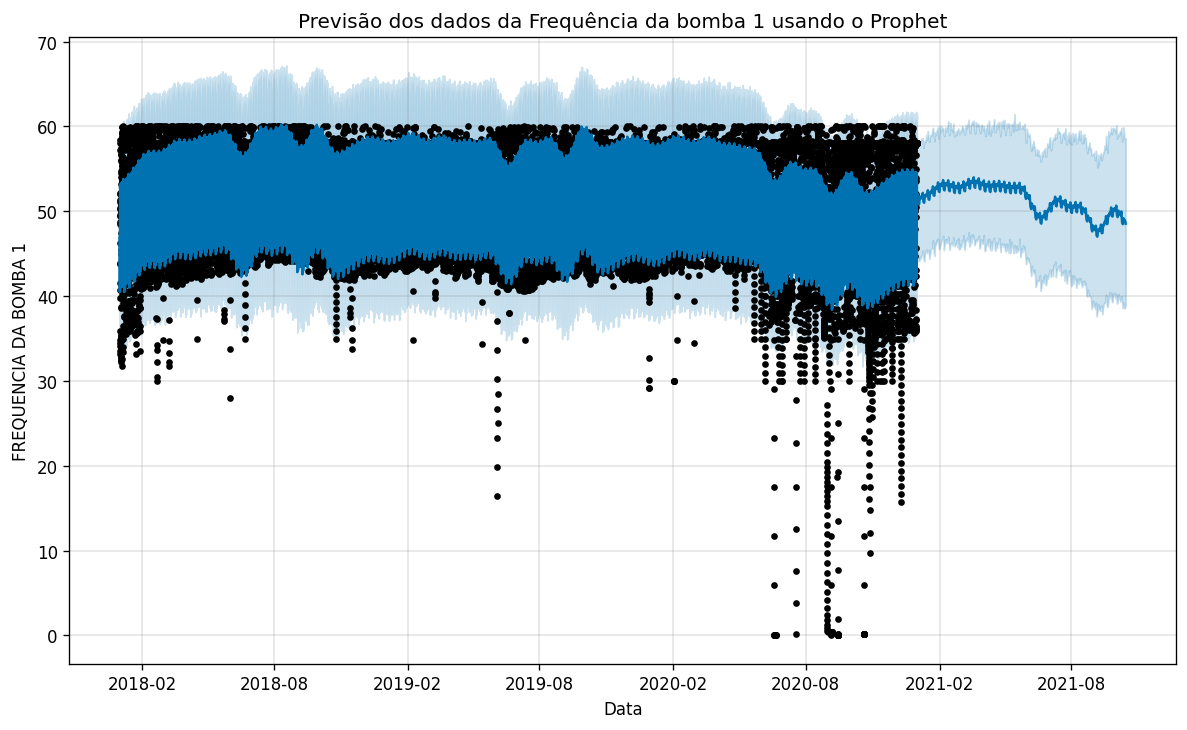

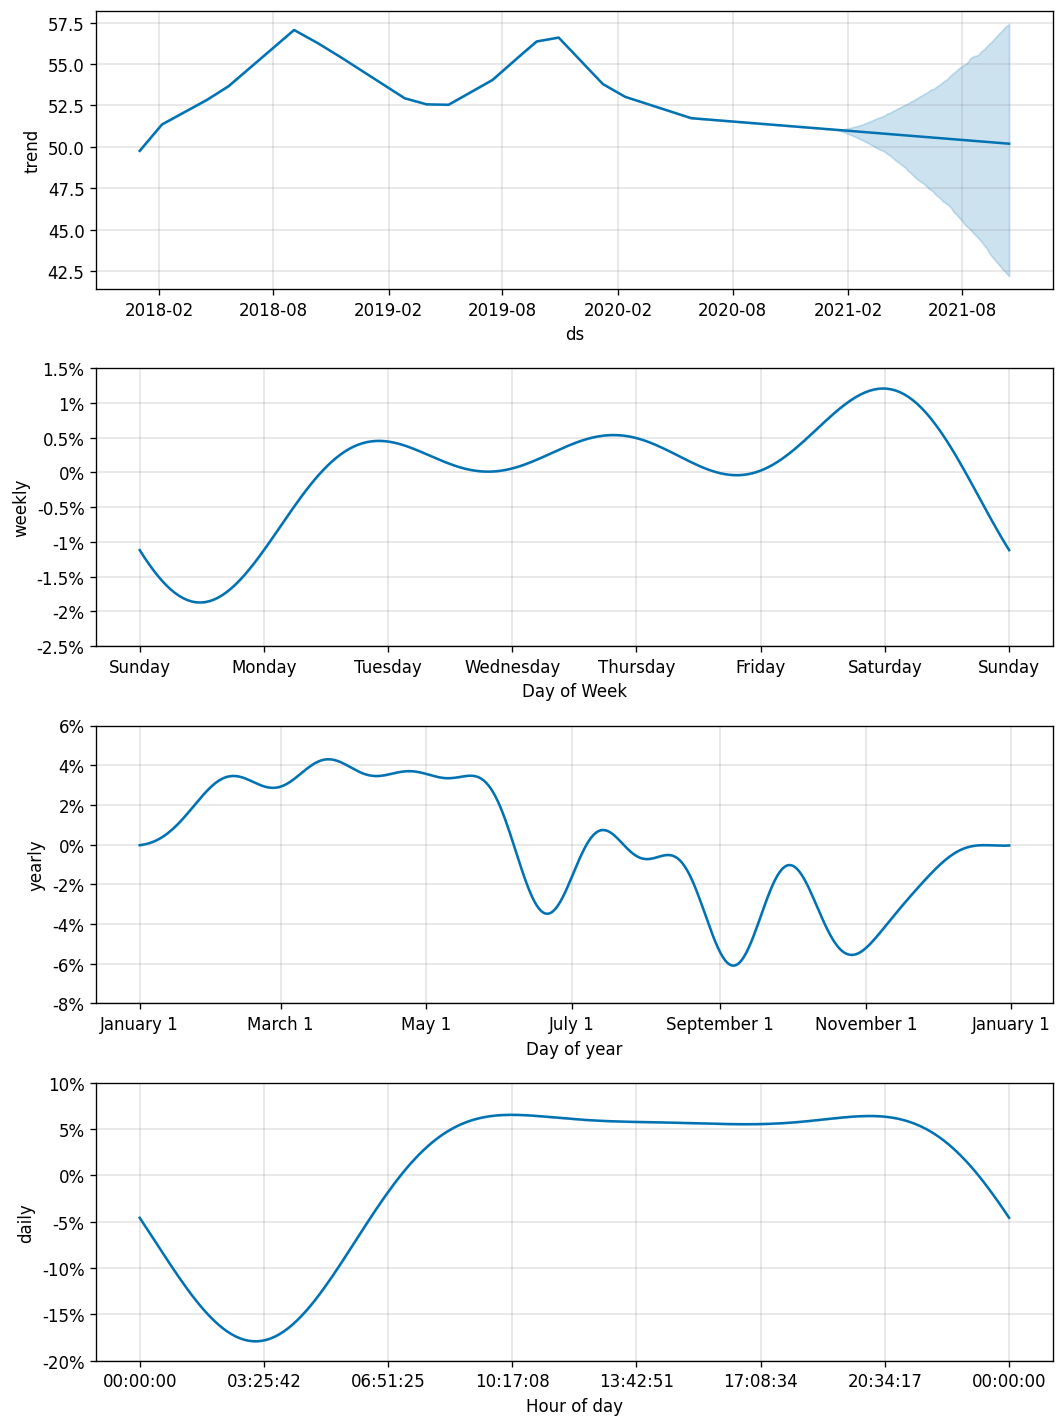

In [ ]:
# método auxiliar para previsão
future = m.make_future_dataframe(periods=dias_a_prever, freq='D')
# previsão do modelo
forecast=m.predict(future)
m.plot(forecast)
plt.title("Previsão dos dados da Frequência da bomba 1 usando o Prophet")
plt.xlabel("Data")
plt.ylabel("FREQUENCIA DA BOMBA 1")
plt.show()
figu2=m.plot_components(forecast)

In [ ]:
# olhando os resultados das previsões com os dados de treino
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0     2018-01-01 00:00:00  46.914216   40.396623   53.583682
1     2018-01-01 01:00:00  44.011544   37.404781   50.922169
2     2018-01-01 02:00:00  41.600838   35.674475   48.424944
3     2018-01-01 03:00:00  40.479700   33.730451   46.690862
4     2018-01-01 04:00:00  41.063693   34.636088   48.179349
...                   ...        ...         ...         ...
26586 2021-10-10 23:00:00  48.474985   38.560717   58.397556
26587 2021-10-11 23:00:00  49.171404   39.212466   59.893573
26588 2021-10-12 23:00:00  48.822034   38.555440   58.783728
26589 2021-10-13 23:00:00  48.918755   38.587585   58.514064
26590 2021-10-14 23:00:00  48.528130   38.956777   58.582159

[26591 rows x 4 columns]

In [ ]:
# importar pacotes necessários
from prophet.diagnostics import cross_validation

#criamos o dataframe de validação
df_cv = cross_validation(m, period="30 days", horizon="180 days")

INFO:prophet:Making 13 forecasts with cutoffs between 2019-07-10 23:00:00 and 2020-07-04 23:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbmast3n/dax4s65v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbmast3n/e65gji0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91735', 'data', 'file=/tmp/tmpkbmast3n/dax4s65v.json', 'init=/tmp/tmpkbmast3n/e65gji0n.json', 'output', 'file=/tmp/tmpkbmast3n/prophet_models754my3r/prophet_model-20240329122700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:27:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbmast3n/uxlbsuat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbmast3n/p9vqaeg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
# criando a função MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# fazendo previsões com os dados de teste
test_forecast = m.predict(test)

horizon         mse       rmse       mae      mape     mdape  \
0     18 days 00:00:00   35.712514   5.975995  2.527941  3.358502  0.020255   
1     18 days 01:00:00   35.710281   5.975808  2.529352  3.358536  0.020267   
2     18 days 02:00:00   35.684294   5.973633  2.528607  3.358540  0.020259   
3     18 days 03:00:00   35.638496   5.969799  2.527324  3.358535  0.020316   
4     18 days 04:00:00   35.581785   5.965047  2.525160  3.358511  0.020285   
...                ...         ...        ...       ...       ...       ...   
3884 179 days 20:00:00  153.048902  12.371293  9.040292  5.066295  0.138194   
3885 179 days 21:00:00  153.341333  12.383107  9.049553  5.066575  0.138274   
3886 179 days 22:00:00  153.593463  12.393283  9.058147  5.066815  0.138349   
3887 179 days 23:00:00  153.741866  12.399269  9.062471  5.066960  0.138406   
3888 180 days 00:00:00  153.785456  12.401026  9.062636  5.066957  0.138379   

         smape  coverage  
0     0.056728  0.825855  
1     0.056759  0.825677  
2     0.056752  0.825321  
3     0.056735  0.825321  
4     0.056698  0.825499  
...        ...       ...  
3884  0.193499  0.441239  
3885  0.193694  0.441061  
3886  0.193869  0.440705  
3887  0.193965  0.440527  
3888  0.193971  0.441061  

[3889 rows x 8 columns]

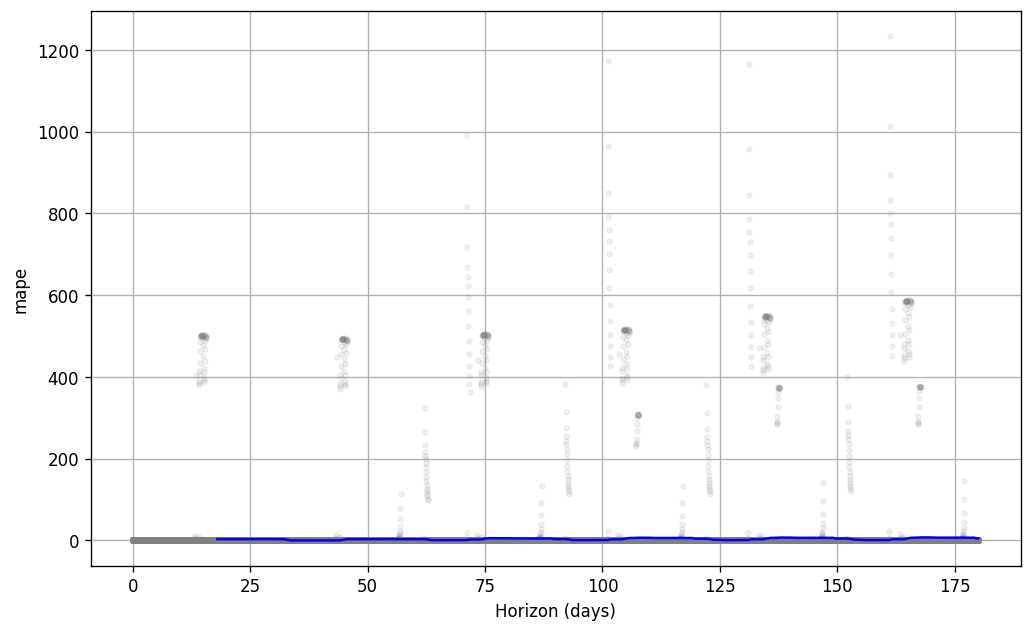

In [ ]:
# importar pacotes
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
import numpy as np

# extrair métricas de desempenho
df_p = performance_metrics(df_cv)
display(df_p)
# exibir métricas de desempenho em um gráfico
fig = plot_cross_validation_metric(df_cv, metric='mape')

#mape = mean_absolute_percentage_error(test['y'],test_forecast['yhat'])
#print("MAPE",round(mape,2),"%")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mape = mean_absolute_percentage_error(test['y'],test_forecast['yhat'])
mae = mean_absolute_error(test['y'],test_forecast['yhat'])
mse = mean_squared_error(test['y'],test_forecast['yhat'], squared=True)
rmse=mean_squared_error(test['y'],test_forecast['yhat'], squared=False)
print("Métricas Prophet:")
print("")
print("  MAE =",round(mae,2))
print("  MSE =",round(mse,2))
print("  MAPE =",round(mape,2))
print("  RMSE =",round(rmse,2))

Métricas Prophet:

  MAE = 4.36
  MSE = 23.79
  MAPE = 8.6
  RMSE = 4.88


# **Hibrido**

In [ ]:
y_true

array([57.36963654, 58.35866165, 52.66415024, 45.73186111, 49.25843048,
       41.12498474, 36.22364426, 35.85088348, 35.82611847, 35.70512772,
       49.63658142, 51.13056946, 55.69478226, 57.98879242, 57.98879242,
       57.98879242, 57.98879242, 57.98879242, 57.98879242, 57.98879242,
       57.98879242, 57.98879242, 57.98879242, 57.98879242, 57.98879242,
       57.98879242, 57.98879242, 47.90633774, 44.77014923, 41.31907272,
       37.10427856, 36.31290054, 35.78678513, 36.12626648, 49.96899033,
       52.18247604, 54.83897781, 57.96971893, 57.94590378, 57.92209244,
       57.89827728, 57.87446213, 57.85064697, 57.82683182, 57.80301666,
       57.77920151, 57.75538635, 57.7315712 , 57.70775604, 57.68394089,
       57.66012573, 54.93067169, 45.71721268, 42.31515503, 37.14033127,
       36.46200943, 35.97554398, 36.2507782 , 50.44623184, 52.02122116,
       56.66678619, 57.98879242, 57.98879242, 57.98879242, 57.98879242,
       57.98879242, 57.98879242, 57.98879242, 57.98879242, 57.98

In [ ]:
y_pred_stats

array([57.19498183, 57.10957105, 58.0991631 , 51.52000242, 43.98887504,
       48.78029569, 41.422744  , 36.66336094, 35.71213427, 37.8433652 ,
       38.25970528, 53.30270502, 53.88862825, 57.61144605, 57.32304087,
       57.83253943, 57.4538602 , 57.47958197, 57.47748768, 57.5516788 ,
       57.52354988, 57.51028357, 57.50712739, 57.51824365, 57.51860946,
       57.51583274, 57.51425122, 57.51555994, 46.1863489 , 43.14813041,
       40.55324068, 38.26484085, 37.51095817, 37.26332735, 38.11266967,
       53.63240603, 55.33031827, 56.52133767, 57.09853639, 57.68703967,
       57.70927654, 57.36017871, 57.29750892, 57.37963395, 57.40886847,
       57.34906076, 57.30219929, 57.28975369, 57.2816944 , 57.25899482,
       57.23215982, 57.21013846, 54.15061243, 43.93315514, 40.86270667,
       36.76405568, 38.11284406, 37.73122217, 38.33557184, 53.90610142,
       55.06668826, 58.58244671, 57.01551447, 57.58841498, 57.414499  ,
       57.63137883, 57.49317713, 57.50793537, 57.49882544, 57.52

In [ ]:
y_pred_pm

array([57.53913121, 57.41182211, 58.50256754, 51.40574059, 43.20047902,
       48.40218617, 40.16200694, 34.67360275, 33.95151558, 36.11722701,
       36.24130254, 52.64570727, 53.53789516, 57.58852906, 57.77968846,
       58.34447406, 57.81223765, 57.83625662, 57.87715821, 57.95508129,
       57.90784223, 57.89614352, 57.89977819, 57.91068559, 57.90752948,
       57.90492546, 57.90481822, 57.90622288, 45.59670686, 42.2699797 ,
       39.43871997, 36.50052378, 35.56535245, 35.42086044, 36.30213705,
       53.10188951, 54.99376479, 56.35444133, 57.59152829, 58.2636315 ,
       58.0254562 , 57.66177607, 57.70593762, 57.79516242, 57.77133129,
       57.70185423, 57.67477641, 57.66560108, 57.64565621, 57.61674014,
       57.59111592, 57.56883714, 54.2425506 , 43.1321811 , 39.77107844,
       35.186667  , 36.24349287, 35.77962143, 36.47829216, 53.47905702,
       54.76458002, 58.57152654, 57.49454744, 58.15244105, 57.79022438,
       57.95538356, 57.87260365, 57.92614739, 57.89782466, 57.90

In [ ]:
yhat = forecast[['yhat']].head(100)
yhat = np.array(yhat)
yhat = yhat.reshape(100,)
yhat

array([46.91421649, 44.01154395, 41.60083765, 40.47970029, 41.06369279,
       43.17849521, 46.13771739, 49.06617854, 51.28249532, 52.53192817,
       52.97079101, 52.9620529 , 52.83750439, 52.76319136, 52.74761563,
       52.73766849, 52.7133987 , 52.71986287, 52.82487035, 53.0321953 ,
       53.20214956, 53.03753144, 52.1761343 , 50.3805063 , 47.74332077,
       44.77921206, 42.30405052, 41.11699026, 41.63480658, 43.68385806,
       46.57795778, 49.44193656, 51.59456879, 52.78162108, 53.16023922,
       53.09435659, 52.91663759, 52.79378335, 52.73473456, 52.68668799,
       52.62994726, 52.60980016, 52.69422412, 52.88701976, 53.04831282,
       52.88049252, 52.02080742, 50.23130153, 47.60437611, 44.65471485,
       42.19845595, 41.0349589 , 41.58081823, 43.66164542, 46.59001959,
       49.48935325, 51.67717449, 52.89839594, 53.30969644, 53.27475251,
       53.12597417, 53.02969627, 52.99439611, 52.96680339, 52.92684286,
       52.9195454 , 53.01271915, 53.21000732, 53.37132024, 53.19

In [ ]:
yhat_lower = forecast[['yhat_lower']].head(100)
yhat_lower = np.array(yhat_lower)
yhat_lower = yhat_lower.reshape(100,)
yhat_lower

array([40.39662315, 37.40478121, 35.67447533, 33.73045126, 34.63608771,
       36.5939535 , 39.64147305, 42.32734271, 44.97585788, 45.50724605,
       46.54293423, 46.50377285, 45.87545641, 46.20429762, 46.76845497,
       46.11722257, 46.00227648, 46.20202512, 46.40448681, 46.16330421,
       46.53717023, 46.40201865, 45.94540619, 43.7140195 , 41.21751997,
       38.66499096, 35.95429001, 34.57174065, 35.10717751, 36.86185215,
       40.0061485 , 42.34956653, 44.85626973, 46.1823418 , 46.15005627,
       47.23467859, 46.25197347, 46.26862155, 46.32078406, 45.75032928,
       46.42938163, 46.21131616, 46.15624792, 46.27672148, 46.69338003,
       45.87536638, 45.3000517 , 43.46098714, 40.53733661, 38.31491959,
       36.02756172, 33.84183629, 34.97927618, 36.75777672, 39.84861913,
       42.91772692, 45.11701572, 46.14420032, 46.80598552, 46.46610393,
       46.359294  , 46.43418932, 46.18372541, 45.934925  , 46.31703087,
       46.08947097, 46.6188575 , 46.43502317, 46.69554116, 46.47

In [ ]:
yhat_upper = forecast[['yhat_upper']].head(100)
yhat_upper = np.array(yhat_upper)
yhat_upper = yhat_upper.reshape(100,)
yhat_upper

array([53.5836824 , 50.92216898, 48.42494387, 46.69086249, 48.17934896,
       49.35104917, 52.80008824, 56.05678399, 58.11958252, 58.77704082,
       59.49565544, 59.43315541, 59.38408802, 59.37087423, 59.60318714,
       59.36267353, 59.40577592, 59.50555084, 59.67027703, 59.8240645 ,
       60.20837338, 60.01858862, 58.76519021, 57.33158426, 54.79795586,
       50.98926483, 49.10328346, 47.91913311, 48.51642692, 50.41479453,
       52.7305184 , 55.86995604, 58.56304546, 59.28141907, 60.13716077,
       59.54347573, 59.22908474, 59.53838282, 59.32828003, 59.0729995 ,
       59.15031719, 59.50541743, 60.12068807, 59.96233545, 59.85268844,
       59.48404904, 58.53855664, 57.3403426 , 53.96924971, 51.42516138,
       49.04717385, 47.45043308, 48.54201228, 50.08302586, 53.04392924,
       55.64688091, 58.2790761 , 59.37375287, 60.1891184 , 59.84984592,
       59.91370575, 59.83119842, 59.61599554, 60.11498303, 59.77168259,
       60.10334013, 60.13228955, 59.96425272, 60.20654738, 60.19

# **Media Simples**

In [ ]:
import numpy as np

# Resultados do modelo ARIMA
arima_results = y_pred_pm

# Resultados do modelo Prophet
prophet_results = yhat

# Valores reais dos dados
real_values = y_true

# Calcular a média simples dos resultados
combined_results = (np.array(arima_results) + np.array(prophet_results)) / 2
print("")
print(combined_results)
print("")

# Calcular as métricas de desempenho
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(real_values, combined_results))
mae = mean_absolute_error(real_values, combined_results)
mse = mean_squared_error(real_values, combined_results)
mape = np.mean(np.abs((real_values - combined_results) / real_values)) * 100

# Imprimir as métricas
print("Métricas de Desempenho:")
print("")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  MAPE: {mape:.2f}%")



[52.22667385 50.71168303 50.05170259 45.94272044 42.1320859  45.79034069
 43.14986216 41.86989065 42.61700545 44.32457759 44.60604677 52.80388009
 53.18769978 55.17586021 55.26365205 55.54107128 55.26281818 55.27805975
 55.35101428 55.49363829 55.5549959  55.46683748 55.03795625 54.14559595
 52.82542512 51.34206876 50.10443437 49.51160657 43.61575672 42.97691888
 43.00833888 42.97123017 43.57996062 44.10124076 44.73118814 53.09812305
 53.95520119 54.57411234 55.16313143 55.47515974 55.32770173 55.13578811
 55.20008087 55.34109109 55.40982206 55.29117338 54.84779192 53.9484513
 52.62501616 51.1357275  49.89478594 49.30189802 47.91168442 43.39691326
 43.18054901 42.33801013 43.96033368 44.33900868 44.8939943  53.37690477
 53.94527709 55.80061141 55.24447178 55.55962222 55.35853362 55.43746448
 55.4426614  55.56807735 55.63457245 55.55394417 55.11603508 54.21614001
 52.89177218 51.40539006 50.16357692 49.56765848 48.01232088 48.41833714
 43.48679108 42.58089    43.75747662 44.78716907 44

In [ ]:
soma2 = []
for i in range(len(y_pred_stats)):
  soma2.append((y_pred_stats[i] + yhat[i])/2)

soma2 = np.array(soma2)
print("Arima Statics Model e Prophet:")
print("")
print(soma2)

mape = mean_absolute_percentage_error(y_pred_stats,yhat)
mae = mean_absolute_error(y_pred_stats,yhat)
mse = mean_squared_error(y_pred_stats,yhat, squared=True)
rmse=mean_squared_error(y_pred_stats,yhat, squared=False)
print("")
print("Métricas Hibridas Arima Statics Model e Prophet:")
print("")
print("  MAE =",round(mae,2))
print("  MSE =",round(mse,2))
print("  MAPE =",round(mape,2))
print("  RMSE =",round(rmse,2))

Arima Statics Model e Prophet:

[52.05459916 50.5605575  49.85000037 45.99985136 42.52628391 45.97939545
 43.78023069 42.86476974 43.4973148  45.18764668 45.61524814 53.13237896
 53.36306632 55.18731871 55.03532825 55.28510396 55.08362945 55.09972242
 55.15117901 55.29193705 55.36284972 55.2739075  54.84163084 53.94937498
 52.63096512 51.1475224  49.90915087 49.3162751  43.91057774 43.41599424
 43.56559923 43.8533887  44.55276348 45.02247421 45.63645445 53.36338131
 54.12347793 54.65756051 54.91663548 55.18686383 55.1696119  54.98498943
 54.99586652 55.13332685 55.22859065 55.11477664 54.66150336 53.76052761
 52.44303526 50.95685484 49.71530789 49.12254868 47.86571533 43.79740028
 43.72636313 43.12670447 44.89500927 45.31480905 45.82263414 53.59042697
 54.09633121 55.80607149 55.00495529 55.27760918 55.17067093 55.27546212
 55.25294814 55.35897134 55.43507284 55.36285877 54.92354037 54.01950518
 52.69516239 51.21032042 49.96890956 49.3724096  47.96136225 48.42044275
 43.99963906 43.353

In [ ]:
soma3 = []
for i in range(len(y_true)):
  soma3.append((y_true[i] + yhat[i])/2)

soma3 = np.array(soma3)
print("Arima Statics Model e Prophet:")
print("")
print(soma3)

mape = mean_absolute_percentage_error(y_true,yhat)
mae = mean_absolute_error(y_true,yhat)
mse = mean_squared_error(y_true,yhat, squared=True)
rmse=mean_squared_error(y_true,yhat, squared=False)
print("")
print("Métricas Hibridas Valores Originais e Prophet:")
print("")
print("  MAE =",round(mae,2))
print("  MSE =",round(mse,2))
print("  MAPE =",round(mape,2))
print("  RMSE =",round(rmse,2))

Arima Statics Model e Prophet:

[52.14192652 51.1851028  47.13249394 43.1057807  45.16106163 42.15173997
 41.18068082 42.45853101 43.55430689 44.11852794 51.30368621 52.04631118
 54.26614332 55.37599189 55.36820402 55.36323046 55.35109556 55.35432765
 55.40683138 55.51049386 55.59547099 55.51316193 55.08246336 54.18464936
 52.8660566  51.38400224 50.14642147 44.511664   43.20247791 42.50146539
 41.84111817 42.87741855 43.69067696 44.45394378 51.56461477 52.63841632
 53.8778077  55.38175114 55.34031917 55.30439021 55.26411227 55.24213114
 55.27243555 55.35692579 55.42566474 55.32984701 54.88809689 53.98143636
 52.65606608 51.16932787 49.92929084 47.9828153  43.64901545 42.98840022
 41.86517543 42.97568134 43.82635923 44.57458707 51.87796414 52.64798684
 54.89638018 55.50924435 55.49159426 55.4777979  55.45781764 55.45416891
 55.50075578 55.59939987 55.68005633 55.59377717 55.1590512  54.2568576
 52.93353896 51.446804   50.2052568  48.1240643  47.81455335 43.44361002
 42.50059206 43.4377

# **Arvores de Decisao**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error  #MSE e RMSE
from sklearn.metrics import mean_absolute_percentage_error # MAPE
# Definindo os vetores
pred_arima = y_pred_pm
pred_deppar = yhat # DeepAR's

# Criar matriz de características combinando as previsões dos modelos individuais
X_combined = np.column_stack((pred_arima, pred_deppar))  # Adicione as previsões dos demais modelos, se houver

# Criar e treinar o modelo de árvore de decisão
decision_tree_model = DecisionTreeRegressor(max_depth=3)  # Defina o número máximo de níveis da árvore
decision_tree_model.fit(X_combined, y_true)

# Previsões combinadas usando o modelo de árvore de decisão
combined_forecast = decision_tree_model.predict(X_combined)
combined_forecast


mae = mean_absolute_error(y_true, combined_forecast)
MAPE = mean_absolute_percentage_error(y_true,  combined_forecast)
MSE = mean_squared_error(y_true, combined_forecast,squared=True) # Se True retornar o valor MSE, se False retornar o valor RMSE.
RMSE = mean_squared_error(y_true, combined_forecast,squared=False)
print("")
print("Metricas de desempenho: ")
print("")
print("  MSE:   " + str(round(MSE, 2)))
print("  RMSE:  " + str(round(RMSE, 2)))
print("  MAE:   " + str(round(mae,2)))
print("  MAPE: ",round(MAPE*100,2),"%")


Metricas de desempenho: 

  MSE:   1.36
  RMSE:  1.16
  MAE:   0.57
  MAPE:  1.19 %


In [ ]:
# Definindo os vetores
pred_arima = y_pred_stats
pred_deppar = yhat # DeepAR's

# Criar matriz de características combinando as previsões dos modelos individuais
X_combined = np.column_stack((pred_arima, pred_deppar))  # Adicione as previsões dos demais modelos, se houver

# Criar e treinar o modelo de árvore de decisão
decision_tree_model = DecisionTreeRegressor(max_depth=3)  # Defina o número máximo de níveis da árvore
decision_tree_model.fit(X_combined, y_true)

# Previsões combinadas usando o modelo de árvore de decisão
combined_forecast = decision_tree_model.predict(X_combined)
combined_forecast


mae = mean_absolute_error(y_true, combined_forecast)
MAPE = mean_absolute_percentage_error(y_true,  combined_forecast)
MSE = mean_squared_error(y_true, combined_forecast,squared=True) # Se True retornar o valor MSE, se False retornar o valor RMSE.
RMSE = mean_squared_error(y_true, combined_forecast,squared=False)
print("")
print("Métricas Hibridas Arima Statics Model e Prophet: ")
print("")
print("  MSE:   " + str(round(MSE, 2)))
print("  RMSE:  " + str(round(RMSE, 2)))
print("  MAE:   " + str(round(mae,2)))
print("  MAPE: ",round(MAPE*100,2),"%")


Métricas Hibridas Arima Statics Model e Prophet: 

  MSE:   1.4
  RMSE:  1.18
  MAE:   0.59
  MAPE:  1.23 %


# **Random Forest**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

pred_arima = y_pred_pm # ARIMA's
pred_deppar = yhat # DeepAR's

# Valores reais dos dados
real_values = y_true


# Criar matriz de características combinando as previsões dos modelos individuais
X_combined = np.column_stack((pred_arima, pred_deppar))

# Criar e treinar o modelo Random Forest
random_forest_model = RandomForestRegressor(n_estimators=1000)  # Defina o número de árvores
random_forest_model.fit(X_combined, y_true)

# Previsão
combined_forecast_rf = random_forest_model.predict(X_combined)

# Avalie o desempenho do modelo (opcional, dependendo do seu caso)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(real_values, combined_forecast_rf))
mae = mean_absolute_error(real_values, combined_forecast_rf)
mse = mean_squared_error(real_values, combined_forecast_rf)
mape = np.mean(np.abs((real_values - combined_forecast_rf) / real_values)) * 100


# Imprimir as métricas
print("Métricas de Desempenho:")
print("")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  MAPE: {mape:.2f}%")


Métricas de Desempenho:

  RMSE: 0.83
  MAE: 0.38
  MSE: 0.68
  MAPE: 0.82%


In [ ]:
pred_arima = y_pred_stats # ARIMA's
pred_deppar = yhat # DeepAR's

# Valores reais dos dados
real_values = y_true


# Criar matriz de características combinando as previsões dos modelos individuais
X_combined = np.column_stack((pred_arima, pred_deppar))

# Criar e treinar o modelo Random Forest
random_forest_model = RandomForestRegressor(n_estimators=1000)  # Defina o número de árvores
random_forest_model.fit(X_combined, y_true)

# Previsão
combined_forecast_rf = random_forest_model.predict(X_combined)

# Avalie o desempenho do modelo (opcional, dependendo do seu caso)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(real_values, combined_forecast_rf))
mae = mean_absolute_error(real_values, combined_forecast_rf)
mse = mean_squared_error(real_values, combined_forecast_rf)
mape = np.mean(np.abs((real_values - combined_forecast_rf) / real_values)) * 100


# Imprimir as métricas
print("Métricas Hibridas Arima Statics Model e Prophet:")
print("")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  MAPE: {mape:.2f}%")

Métricas Hibridas Arima Statics Model e Prophet:

  RMSE: 0.90
  MAE: 0.42
  MSE: 0.80
  MAPE: 0.89%


# **Media Ponderada**

In [ ]:
import numpy as np

# Resultados do modelo ARIMA
arima_results = y_pred_pm

# Resultados do modelo Prophet
prophet_results = yhat

# Valores reais dos dados
real_values = y_true

# Definir os pesos para cada modelo (por exemplo, 0.6 para ARIMA e 0.4 para Prophet)
peso_arima = 0.6
peso_prophet = 0.4

# Calcular a média ponderada dos resultados
combined_results = np.array(arima_results) * peso_arima + np.array(prophet_results) * peso_prophet
print("")
print(combined_results)
print("")
# Calcular as métricas de desempenho
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(real_values, combined_results))
mae = mean_absolute_error(real_values, combined_results)
mse = mean_squared_error(real_values, combined_results)
mape = np.mean(np.abs((real_values - combined_results) / real_values)) * 100

# Imprimir as métricas
print("Métricas de Desempenho:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")


[53.28916532 52.05171085 51.74187558 47.03532447 42.34576453 46.31270979
 42.55229112 40.43063307 40.88390748 42.68310747 42.93309793 52.77224552
 53.25773886 55.65839398 55.76685933 56.10175183 55.77270207 55.78969912
 55.85624307 55.98592689 56.02556517 55.95269869 55.61032063 54.89861388
 53.84184599 52.6546401  51.66451114 51.19052983 44.01194675 42.83553105
 42.2944151  41.67708889 41.97703899 42.36516469 43.04537792 53.09887634
 54.16291391 54.93017814 55.6488108  56.03285409 55.86725262 55.64098571
 55.70125222 55.83190536 55.8821239  55.77330955 55.41318882 54.69188126
 53.62914417 52.43193002 51.43405193 50.95528585 49.17785765 43.34396683
 42.4986549  40.9077415  42.41696552 42.62713123 43.21085387 53.39733522
 54.10913768 56.35479443 55.69448691 56.07818598 55.84487177 55.9410483
 55.92864985 56.03969136 56.08722289 56.02498062 55.6733801  54.95438346
 53.89446952 52.70550496 51.71194807 51.23529523 49.2656872  49.34286348
 42.84562818 41.18519487 42.16627673 43.16456008 42

In [ ]:
import numpy as np

# Resultados do modelo ARIMA
arima_results = y_pred_stats

# Resultados do modelo Prophet
prophet_results = yhat

# Valores reais dos dados
real_values = y_true

# Definir os pesos para cada modelo (por exemplo, 0.6 para ARIMA e 0.4 para Prophet)
peso_arima = 0.6
peso_prophet = 0.4

# Calcular a média ponderada dos resultados
combined_results = np.array(arima_results) * peso_arima + np.array(prophet_results) * peso_prophet
print("")
print(combined_results)
print("")
# Calcular as métricas de desempenho
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(real_values, combined_results))
mae = mean_absolute_error(real_values, combined_results)
mse = mean_squared_error(real_values, combined_results)
mape = np.mean(np.abs((real_values - combined_results) / real_values)) * 100

# Imprimir as métricas
print("Métricas de Desempenho:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")


[53.08267569 51.87036021 51.49983292 47.10388157 42.81880214 46.5395755
 43.30873335 41.62448798 41.94027869 43.71879039 44.14413957 53.16644417
 53.46817871 55.67214418 55.49287077 55.79459106 55.5576756  55.57569433
 55.61644074 55.7438854  55.79498976 55.72118271 55.37473015 54.66314871
 53.60849398 52.42118447 51.43017094 50.95613207 44.36573197 43.36242147
 42.96312752 42.73567913 43.14440242 43.47064484 44.13169749 53.41718625
 54.364846   55.03031594 55.35301566 55.686899   55.67754483 55.46002729
 55.456195   55.58258827 55.66464621 55.56163347 55.18964255 54.46637283
 53.41076709 52.21728283 51.21867828 50.74006664 49.12269475 43.82455125
 43.15363184 41.85417471 43.53857623 43.79809168 44.32522168 53.65356186
 54.29040262 56.36134654 55.40706712 55.73977034 55.61943655 55.74664546
 55.70099393 55.78876415 55.84782336 55.79567814 55.44238644 54.71842166
 53.65853776 52.47142138 51.47834724 51.00099657 49.20453684 49.34539021
 43.46104575 42.11196574 43.11422674 44.28856518 44

# **Boosting**

In [ ]:
pip install xgboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Suponha que você já tenha as previsões do ARIMA e do Prophet em duas listas com 100 valores cada:
yhat_arima = y_pred_pm
yhat_prophet = yhat

# Suponha também que você tenha os valores reais do consumo de água em outra lista com 100 valores:
consumo_real = y_true

# Combine as previsões dos dois modelos em um único conjunto de dados
dados_hibrido = list(zip(yhat_arima, yhat_prophet))

# Separe os dados em recursos (features) e valor alvo (target)
X = dados_hibrido
y = consumo_real

# Divida o conjunto de dados em treinamento e teste (por exemplo, usando os primeiros 80 valores como treinamento e os últimos 20 valores como teste)
X_treino, X_teste = X[:80], X[80:]
y_treino, y_teste = y[:80], y[80:]

# Crie o modelo de AdaBoostRegressor usando uma DecisionTreeRegressor como estimador base
modelo_boosting = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

# Ajuste o modelo aos dados de treinamento
modelo_boosting.fit(X_treino, y_treino)

# Faça a previsão usando o modelo de Boosting
previsao_boosting = modelo_boosting.predict(X_teste)
print(previsao_boosting)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_boosting)
mae = mean_absolute_error(y_teste, previsao_boosting)
mape = mean_absolute_percentage_error(y_teste, previsao_boosting)
rmse = mean_squared_error(y_teste, previsao_boosting, squared=False)


# Imprimir as métricas
print("")
print("Métricas de Desempenho:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")

[36.2507782  36.2507782  49.63658142 51.13056946 55.69478226 54.83897781
 57.98879242 57.98879242 57.98879242 57.94590378 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 55.01865387]

Métricas de Desempenho:
RMSE: 1.08
MAE: 0.45
MSE: 1.17
MAPE: 0.01%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
yhat_arima = y_pred_stats
yhat_prophet = yhat

# Suponha também que você tenha os valores reais do consumo de água em outra lista com 100 valores:
consumo_real = y_true

# Combine as previsões dos dois modelos em um único conjunto de dados
dados_hibrido = list(zip(yhat_arima, yhat_prophet))

# Separe os dados em recursos (features) e valor alvo (target)
X = dados_hibrido
y = consumo_real

# Divida o conjunto de dados em treinamento e teste (por exemplo, usando os primeiros 80 valores como treinamento e os últimos 20 valores como teste)
X_treino, X_teste = X[:80], X[80:]
y_treino, y_teste = y[:80], y[80:]

# Crie o modelo de AdaBoostRegressor usando uma DecisionTreeRegressor como estimador base
modelo_boosting = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

# Ajuste o modelo aos dados de treinamento
modelo_boosting.fit(X_treino, y_treino)

# Faça a previsão usando o modelo de Boosting
previsao_boosting = modelo_boosting.predict(X_teste)
print(previsao_boosting)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_boosting)
mae = mean_absolute_error(y_teste, previsao_boosting)
mape = mean_absolute_percentage_error(y_teste, previsao_boosting)
rmse = mean_squared_error(y_teste, previsao_boosting, squared=False)


# Imprimir as métricas
print("")
print("Métricas Hibridas Arima Statics Model e Prophet:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[35.97554398 36.31290054 49.96899033 50.44623184 52.18247604 55.69478226
 57.98879242 57.98879242 57.98879242 57.94590378 57.98879242 57.98879242
 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242 57.98879242
 57.98879242 55.01865387]

Métricas Hibridas Arima Statics Model e Prophet:
RMSE: 0.93
MAE: 0.44
MSE: 0.86
MAPE: 0.01%


# **XGBoost**

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Suponha que você já tenha as previsões do ARIMA e do Prophet em duas listas com 100 valores cada:
yhat_arima = y_pred_pm
yhat_prophet = yhat

# Suponha também que você tenha os valores reais do consumo de água em outra lista com 100 valores:
consumo_real = y_true  # lista com 100 valores reais do consumo de água

# Combine as previsões dos dois modelos em um único conjunto de dados
dados_hibrido = np.column_stack((yhat_arima, yhat_prophet))

# Separe os dados em recursos (features) e valor alvo (target)
X = dados_hibrido
y = consumo_real

# Divida o conjunto de dados em treinamento e teste (por exemplo, usando os primeiros 80 valores como treinamento e os últimos 20 valores como teste)
X_treino, X_teste = X[:80], X[80:]
y_treino, y_teste = y[:80], y[80:]

# Crie o modelo XGBoost
modelo_xgboost = XGBRegressor()

# Ajuste o modelo aos dados de treinamento
modelo_xgboost.fit(X_treino, y_treino)

# Faça a previsão usando o modelo XGBoost
previsao_xgboost = modelo_xgboost.predict(X_teste)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_xgboost)
mae = mean_absolute_error(y_teste, previsao_xgboost)
mape = mean_absolute_percentage_error(y_teste, previsao_xgboost)
rmse = mean_squared_error(y_teste, previsao_xgboost, squared=False)

# Imprimir as métricas
print("Métricas Hibridas Arima Pmdarima e Prophet:")
print("")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MSE: {mse:.2f}")
print(f"   MAPE: {mape:.2f}%")


Métricas Hibridas Arima Pmdarima e Prophet:

   RMSE: 1.65
   MAE: 0.70
   MSE: 2.71
   MAPE: 0.01%


In [ ]:
yhat_arima = y_pred_stats
yhat_prophet = yhat

# Suponha também que você tenha os valores reais do consumo de água em outra lista com 100 valores:
consumo_real = y_true  # lista com 100 valores reais do consumo de água

# Combine as previsões dos dois modelos em um único conjunto de dados
dados_hibrido = np.column_stack((yhat_arima, yhat_prophet))

# Separe os dados em recursos (features) e valor alvo (target)
X = dados_hibrido
y = consumo_real

# Divida o conjunto de dados em treinamento e teste (por exemplo, usando os primeiros 80 valores como treinamento e os últimos 20 valores como teste)
X_treino, X_teste = X[:80], X[80:]
y_treino, y_teste = y[:80], y[80:]

# Crie o modelo XGBoost
modelo_xgboost = XGBRegressor()

# Ajuste o modelo aos dados de treinamento
modelo_xgboost.fit(X_treino, y_treino)

# Faça a previsão usando o modelo XGBoost
previsao_xgboost = modelo_xgboost.predict(X_teste)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_xgboost)
mae = mean_absolute_error(y_teste, previsao_xgboost)
mape = mean_absolute_percentage_error(y_teste, previsao_xgboost)
rmse = mean_squared_error(y_teste, previsao_xgboost, squared=False)

# Imprimir as métricas
print("Métricas Hibridas Arima Statics Model e Prophet:")
print("")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MSE: {mse:.2f}")
print(f"   MAPE: {mape:.2f}%")

Métricas Hibridas Arima Statics Model e Prophet:

   RMSE: 1.31
   MAE: 0.63
   MSE: 1.71
   MAPE: 0.01%


# **LightGBM**

In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Suponha que você já tenha as previsões do ARIMA e do Prophet em duas listas com 100 valores cada:
yhat_arima = y_pred_pm
yhat_prophet = yhat

# Suponha também que você tenha os valores reais do consumo de água em outra lista com 100 valores:
consumo_real = y_true  # lista com 100 valores reais do consumo de água

# Combine as previsões dos dois modelos em um único conjunto de dados
dados_hibrido = np.column_stack((yhat_arima, yhat_prophet))

# Separe os dados em recursos (features) e valor alvo (target)
X = dados_hibrido
y = consumo_real

# Divida o conjunto de dados em treinamento e teste (por exemplo, usando os primeiros 80 valores como treinamento e os últimos 20 valores como teste)
X_treino, X_teste = X[:80], X[80:]
y_treino, y_teste = y[:80], y[80:]

# Crie o modelo LightGBM
modelo_lightgbm = lgb.LGBMRegressor()

# Ajuste o modelo aos dados de treinamento
modelo_lightgbm.fit(X_treino, y_treino)

# Faça a previsão usando o modelo LightGBM
previsao_lightgbm = modelo_lightgbm.predict(X_teste)
print(previsao_lightgbm)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_lightgbm)
mae = mean_absolute_error(y_teste, previsao_lightgbm)
mape = mean_absolute_percentage_error(y_teste, previsao_lightgbm)
rmse = mean_squared_error(y_teste, previsao_lightgbm, squared=False)

# Imprimir as métricas
print("")
print("Métricas de Desempenho:")
print("")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MSE: {mse:.2f}")
print(f"   MAPE: {mape:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 2
[LightGBM] [Info] Start training from score 51.869141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
yhat_arima = y_pred_stats
yhat_prophet = yhat

# Suponha também que você tenha os valores reais do consumo de água em outra lista com 100 valores:
consumo_real = y_true  # lista com 100 valores reais do consumo de água

# Combine as previsões dos dois modelos em um único conjunto de dados
dados_hibrido = np.column_stack((yhat_arima, yhat_prophet))

# Separe os dados em recursos (features) e valor alvo (target)
X = dados_hibrido
y = consumo_real

# Divida o conjunto de dados em treinamento e teste (por exemplo, usando os primeiros 80 valores como treinamento e os últimos 20 valores como teste)
X_treino, X_teste = X[:80], X[80:]
y_treino, y_teste = y[:80], y[80:]

# Crie o modelo LightGBM
modelo_lightgbm = lgb.LGBMRegressor()

# Ajuste o modelo aos dados de treinamento
modelo_lightgbm.fit(X_treino, y_treino)

# Faça a previsão usando o modelo LightGBM
previsao_lightgbm = modelo_lightgbm.predict(X_teste)
print(previsao_lightgbm)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_lightgbm)
mae = mean_absolute_error(y_teste, previsao_lightgbm)
mape = mean_absolute_percentage_error(y_teste, previsao_lightgbm)
rmse = mean_squared_error(y_teste, previsao_lightgbm, squared=False)

# Imprimir as métricas
print("")
print("Métricas de Desempenho:")
print("")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MSE: {mse:.2f}")
print(f"   MAPE: {mape:.2f}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 2
[LightGBM] [Info] Start training from score 51.869141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# **GBM**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error  #MSE e RMSE
from sklearn.metrics import mean_absolute_percentage_error # MAPE
# Definindo os vetores
pred_arima = y_pred_pm # ARIMA's
pred_deppar = yhat # Prophet

# Criar matriz de características combinando as previsões dos modelos individuais
X_combined = np.column_stack((pred_arima, pred_deppar))  # Adicione as previsões dos demais modelos, se houver

# Criar e treinar o modelo Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100)  # Defina o número de estimadores
gradient_boosting_model.fit(X_combined, y_true)

# Previsão
combined_forecast_gb = gradient_boosting_model.predict(X_combined)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_lightgbm)
mae = mean_absolute_error(y_teste, previsao_lightgbm)
mape = mean_absolute_percentage_error(y_teste, previsao_lightgbm)
rmse = mean_squared_error(y_teste, previsao_lightgbm, squared=False)

# Imprimir as métricas
print("")
print("Métricas de Desempenho:")
print("")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MSE: {mse:.2f}")
print(f"   MAPE: {mape:.2f}%")


Métricas de Desempenho:

   RMSE: 1.84
   MAE: 1.21
   MSE: 3.39
   MAPE: 0.03%


In [ ]:
pred_arima = y_pred_stats # ARIMA's
pred_deppar = yhat # Prophet

# Criar matriz de características combinando as previsões dos modelos individuais
X_combined = np.column_stack((pred_arima, pred_deppar))  # Adicione as previsões dos demais modelos, se houver

# Criar e treinar o modelo Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100)  # Defina o número de estimadores
gradient_boosting_model.fit(X_combined, y_true)

# Previsão
combined_forecast_gb = gradient_boosting_model.predict(X_combined)

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_lightgbm)
mae = mean_absolute_error(y_teste, previsao_lightgbm)
mape = mean_absolute_percentage_error(y_teste, previsao_lightgbm)
rmse = mean_squared_error(y_teste, previsao_lightgbm, squared=False)

# Imprimir as métricas
print("")
print("Métricas de Desempenho:")
print("")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MSE: {mse:.2f}")
print(f"   MAPE: {mape:.2f}%")


Métricas de Desempenho:

   RMSE: 1.84
   MAE: 1.21
   MSE: 3.39
   MAPE: 0.03%


In [ ]:
# Importando as bibliotecas
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Gerando as duas séries temporais (exemplo)
arima_results = y_pred_pm # Valores gerados pelo ARIMA
prophet_results = yhat # Valores gerados pelo Prophet

# Criando o vetor de targets (valores reais ou observados)
targets = np.random.rand(100) # Valores reais (exemplo)

# Concatenando os resultados do ARIMA e Prophet para formar as features
features = np.column_stack((arima_results, prophet_results))

# Dividindo os dados em treino e teste (exemplo)
train_size = 80
train_features, train_targets = features[:train_size], targets[:train_size]
test_features, test_targets = features[train_size:], targets[train_size:]

# Criando o modelo GradientBoostingRegressor
n_estimators = 50  # Número de estimadores (número de iterações do boosting)
learning_rate = 0.1  # Taxa de aprendizado
model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)

# Treinando o modelo
model.fit(train_features, train_targets)

# Fazendo previsões no conjunto de teste
predictions = model.predict(test_features)

# Calculando as métricas de desempenho
mse = mean_squared_error(test_targets, predictions)
mae = mean_absolute_error(test_targets, predictions)
mape = mean_absolute_percentage_error(test_targets, predictions)
rmse = np.sqrt(mse)

# Imprimindo as métricas de desempenho
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.06840906560634012
Mean Absolute Error (MAE): 0.21648973591385742
Mean Absolute Percentage Error (MAPE): 1.421070627073468
Root Mean Squared Error (RMSE): 0.26155126764429976


In [ ]:
arima_results = y_pred_stats # Valores gerados pelo ARIMA
prophet_results = yhat # Valores gerados pelo Prophet

# Criando o vetor de targets (valores reais ou observados)
targets = np.random.rand(100) # Valores reais (exemplo)

# Concatenando os resultados do ARIMA e Prophet para formar as features
features = np.column_stack((arima_results, prophet_results))

# Dividindo os dados em treino e teste (exemplo)
train_size = 80
train_features, train_targets = features[:train_size], targets[:train_size]
test_features, test_targets = features[train_size:], targets[train_size:]

# Criando o modelo GradientBoostingRegressor
n_estimators = 50  # Número de estimadores (número de iterações do boosting)
learning_rate = 0.1  # Taxa de aprendizado
model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)

# Treinando o modelo
model.fit(train_features, train_targets)

# Fazendo previsões no conjunto de teste
predictions = model.predict(test_features)

# Calculando as métricas de desempenho
mse = mean_squared_error(test_targets, predictions)
mae = mean_absolute_error(test_targets, predictions)
mape = mean_absolute_percentage_error(test_targets, predictions)
rmse = np.sqrt(mse)

# Imprimindo as métricas de desempenho
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.11260646712807151
Mean Absolute Error (MAE): 0.2821410856865609
Mean Absolute Percentage Error (MAPE): 0.7434393930331881
Root Mean Squared Error (RMSE): 0.33556887091634635


# **TBATS**

In [ ]:
pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 652.8 kB/s eta 0:00:00


In [ ]:
import numpy as np
from tbats import BATS,TBATS
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Previsões do ARIMA e do Prophet em duas listas com 100 valores cada:
yhat_arima = y_pred_pm
yhat_prophet = yhat

# Valores reais do consumo de água em outra lista com 100 valores:
consumo_real = y_true  # lista com 100 valores reais do consumo de água

# Combinar as previsões dos dois modelos em um único conjunto de dados
dados_hibrido = np.column_stack((yhat_arima, yhat_prophet))

# Separar os dados em recursos (features) e valor alvo (target)
X = dados_hibrido
y = consumo_real

# Dividir o conjunto de dados em treinamento e teste (por exemplo, usando os primeiros 80 valores como treinamento e os últimos 20 valores como teste)
X_treino, X_teste = X[:80], X[80:]
y_treino, y_teste = y[:80], y[80:]

# Criar o modelo TBATS
modelo_tbats = TBATS()

# Ajustar o modelo aos dados de treinamento
modelo_tbats.fit(y_treino)

# Faça a previsão usando o modelo TBATS
previsao_tbats = modelo_tbats.forecast(steps=len(y_teste))

# Calcule as métricas de desempenho
mse = mean_squared_error(y_teste, previsao_tbats)
mae = mean_absolute_error(y_teste, previsao_tbats)
mape = mean_absolute_percentage_error(y_teste, previsao_tbats)
rmse = mean_squared_error(y_teste, previsao_tbats, squared=False)

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)


AttributeError: 'TBATS' object has no attribute 'forecast'

In [ ]:
# Instale a biblioteca tbats antes de executar o código
# pip install tbats

import numpy as np
from tbats import BATS,TBATS
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Gerando as duas séries temporais (exemplo)
arima_results = y_pred_pm # Valores gerados pelo ARIMA
prophet_results = yhat # Valores gerados pelo Prophet

# Criando o vetor de targets (valores reais ou observados)
targets = y_true # Valores reais (exemplo)

# Concatenando os resultados do ARIMA e Prophet para formar as features
features = np.column_stack((arima_results, prophet_results))

# Dividindo os dados em treino e teste (exemplo)
train_size = 80
train_features, train_targets = features[:train_size], targets[:train_size]
test_features, test_targets = features[train_size:], targets[train_size:]

# Criando o modelo TBATS
model = TBATS(seasonal_periods=[12, 52])  # Defina os períodos sazonais adequados para o seu problema

# Treinando o modelo
model.fit(train_targets)

# Fazendo previsões no conjunto de teste
predictions = model.forecast(steps=len(test_targets))

# Calculando as métricas de desempenho
mse = mean_squared_error(test_targets, predictions)
mae = mean_absolute_error(test_targets, predictions)
mape = mean_absolute_percentage_error(test_targets, predictions)
rmse = np.sqrt(mse)

# Imprimindo as métricas de desempenho
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)
